### This jupyter notebook is to unit-test CFE model run

## Preparation

In [1]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [2]:
# Input: Mahurangi data for 3 yrs
# forcing: Mahurangi/mahurangi_1998_2001.csv
# observed: test_sm_basinavg

# Input: Little Washita data for 12 yrs
# forcing: LittleWashita/little_washita_2006_2012.csv
# observed: test_sm_basinavg


# Parameter: only limited number of parameters

# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parnum_nash_storage
# 978	978	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391
# 983	983	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391
# 996	996	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391
# 997	997	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391

# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parD	parnum_nash_storage
# 983	983	0.894732	2.681012	0.002089	0.0691	0.610569	0.810173	0.328043	155.984926	0.867912	18.446594	0.041251	4506.129197	0.75	0.244591	0.894035	1.0	51.657007
# 997	997	0.894732	2.681012	0.002089	0.0691	0.610569	0.810173	0.328043	155.984926	0.867912	18.446594	0.041251	4946.256968	0.75	0.244591	0.894035	1.0	51.657007

input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/mahurangi_1998_2001.csv", 
    "catchment_area_km2": 46.65, 
    "soil_params": {
        "bb": 2.681012, 
        "satdk": 0.002089, 
        "slop": 0.610569, 
        "satpsi": 0.0691, 
        "smcmax": 0.810173, 
        "wltsmc": 0.328043, 
        "D": 1
        }, 
        "alpha_fc":0.244591, 
        "max_gw_storage": 155.984926, 
        "Cgw": 0.867912, 
        "expon": 18.446594, 
        "K_lf": 0.894035, 
        "refkdt": 4946.256968, 
        "K_nash": 0.041251, 
        "trigger_z_fact": 0.75, 
        "num_nash_storage": 51, 
        "giuh_ordinates": [0.1, 0.2, 0.4, 0.2, 0.1], 
        "stand_alone": 1, 
        "unit_test": 1, 
        "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/test_sm_basinavg.csv"
        }

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

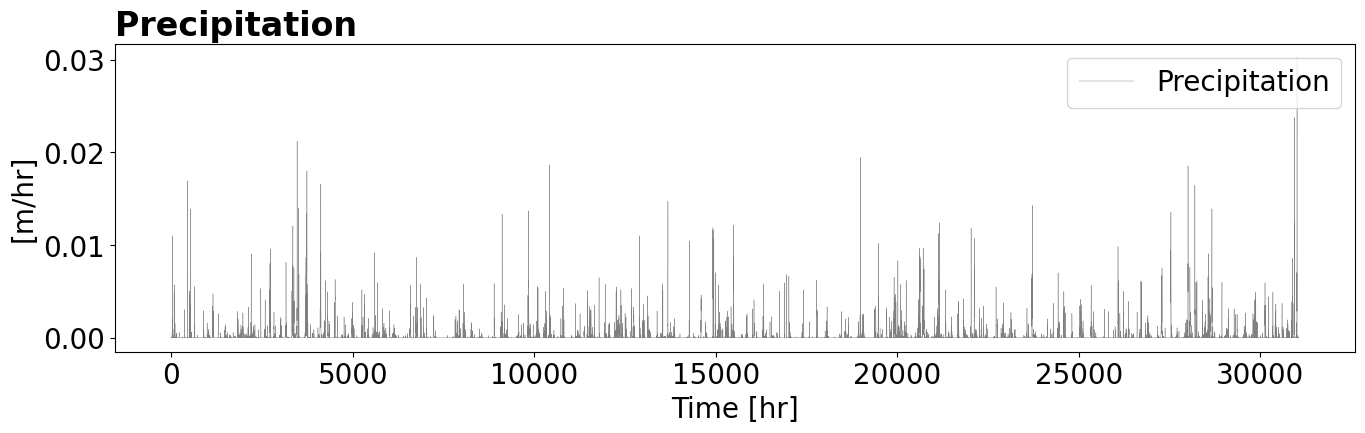

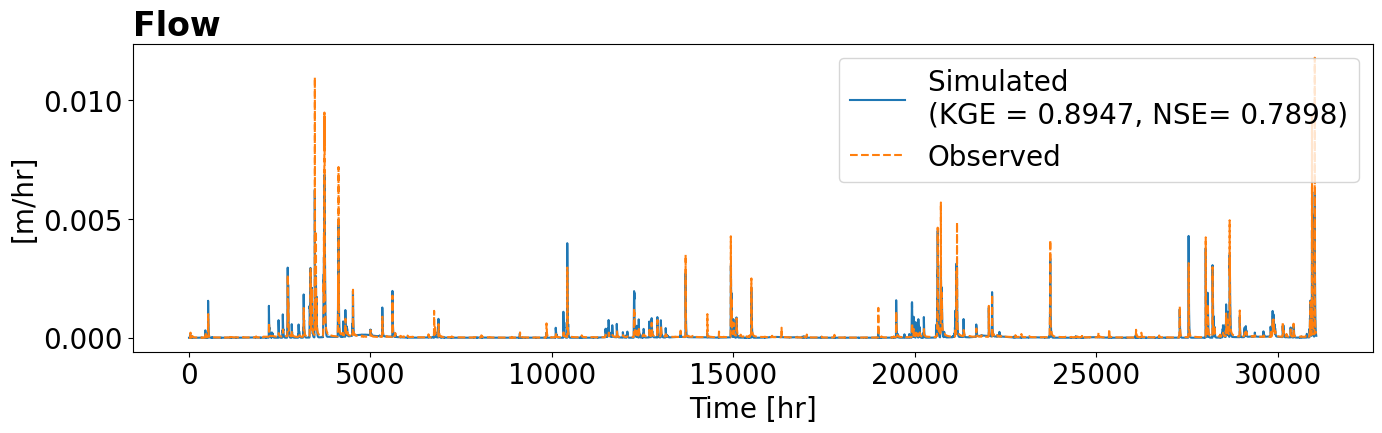

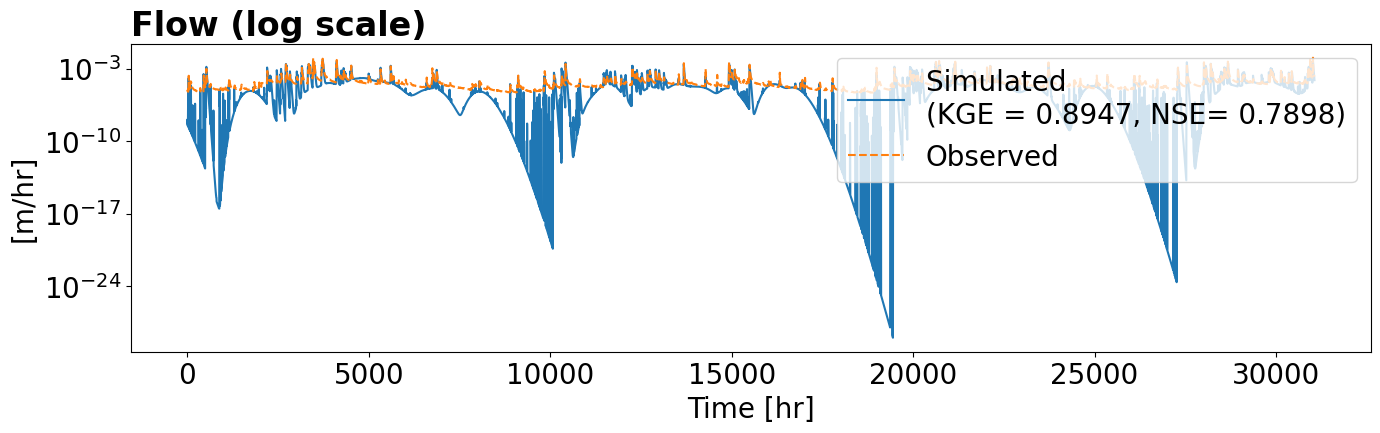

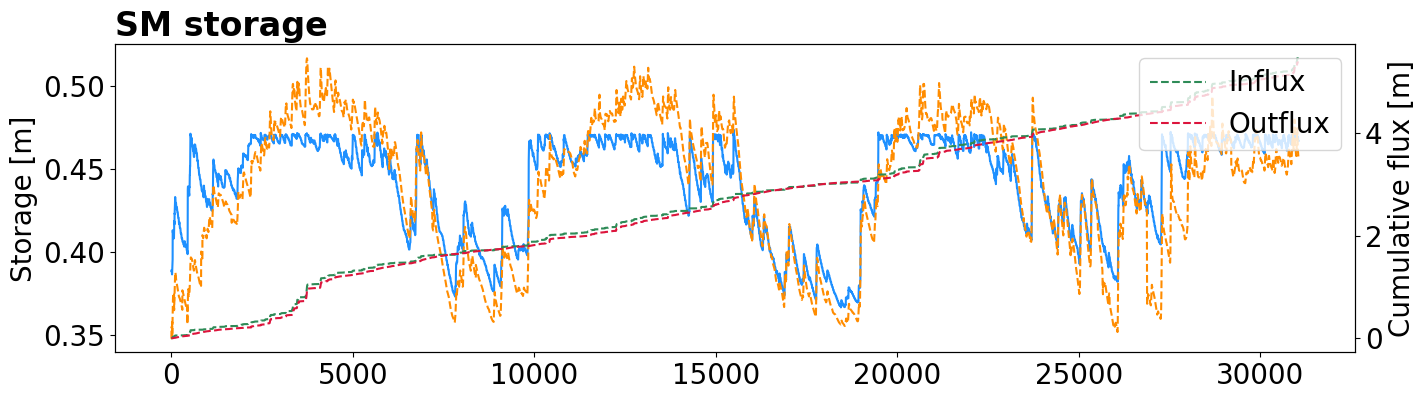

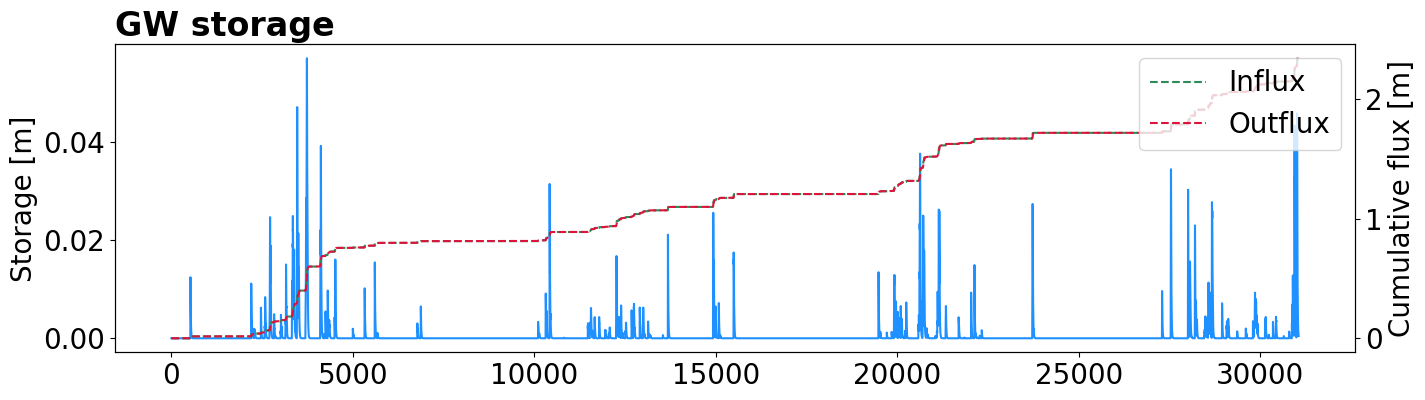

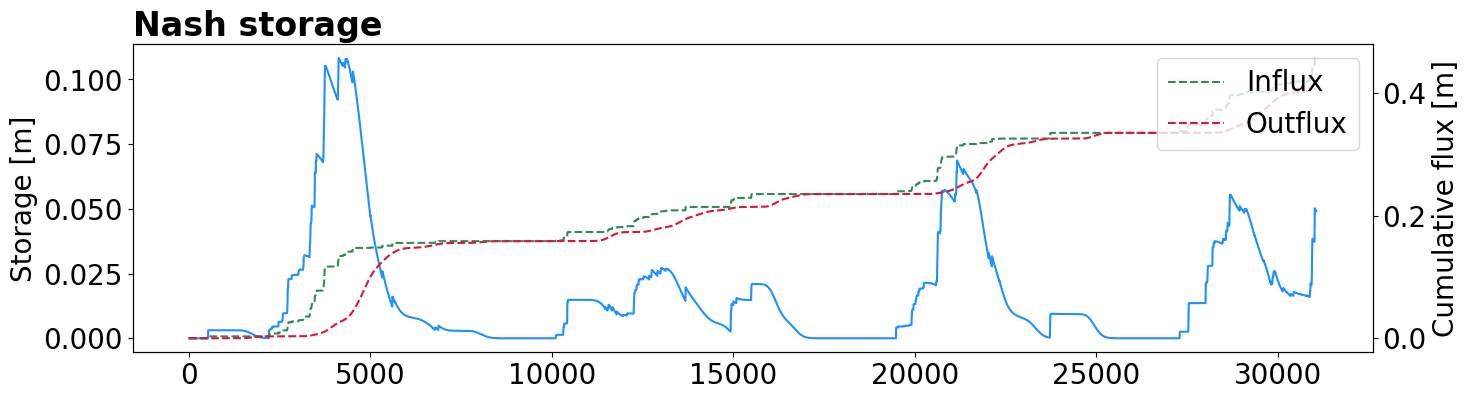

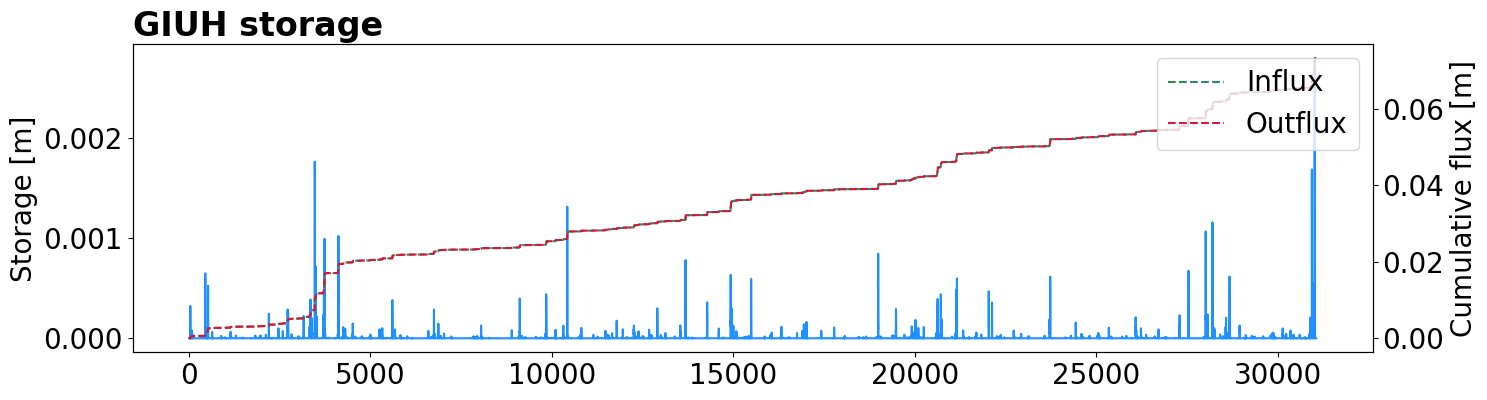


GLOBAL MASS BALANCE
      initial volume:   0.3886
        volume input:   5.9829
       volume output:   5.9044
        final volume:   0.4671
            residual: 1.1957e-13

 Discharge details
Cumulative discharge: 2.82
        Runoff ratio: 0.47
      Surface runoff: 0.03
  Deep GW to channel: 0.83
        Lateral flow: 0.14

 AET & PET
      volume PET:   4.0315
      volume AET:   3.0318
ET from rainfall:   0.4567
    ET from soil:   2.5751

SCHAAKE MASS BALANCE
    volume input:   5.9829
ET from rainfall:   0.4567
  surface runoff:   0.0732
             IOF:   0.0732
             SOF:   0.0000
    infiltration:   5.4529
schaake residual: 6.3949e-14

GIUH MASS BALANCE
  vol. into giuh:   0.0732
   vol. out giuh:   0.0732
 vol. end giuh q:   0.0000
   giuh residual: 5.5511e-17

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.3886
  vol. into soil:   5.4529
vol.soil2latflow:   0.4563
 vol. soil to gw:   2.3435
 vol. soil to ET:   2.5751
 final vol. soil:   0.46

In [3]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(plot=True, print_fluxes=False, warm_up=True)
cfe_instance.finalize(print_mass_balance=True)